## Importing Libraries

In [24]:
#First step- import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


# Problem Statement

Q1--1) Delivery_time -> Predict delivery time using sorting time
    2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

### Q-1 ANS
Delivery_time


## Importing Dataset

In [25]:
#Q1--1) ANS

In [26]:
#Load the dataset first
delivery_time =pd.read_csv("delivery_time.csv")

In [27]:
# Renamin the colume
dt = delivery_time.rename({'Delivery Time':'delivery_time','Sorting Time': 'sorting_time'}, axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## PERFORMING EDA AND DATA VISUALIZATION

In [28]:
#shows top 5 default results from dataset
dt.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [30]:
#Shows descriptive statistics info
dt.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
# Checking for null values
dt.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [32]:
# Checking for duplicate values
dt['delivery_time'].duplicated().sum()

0

In [33]:
#finding shape
dt.shape

(21, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20ded3880>,
 'caps': [<matplotlib.lines.Line2D at 0x1a20ded28f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a20ded30a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a20df959c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a20df95c60>,
 'means': []}

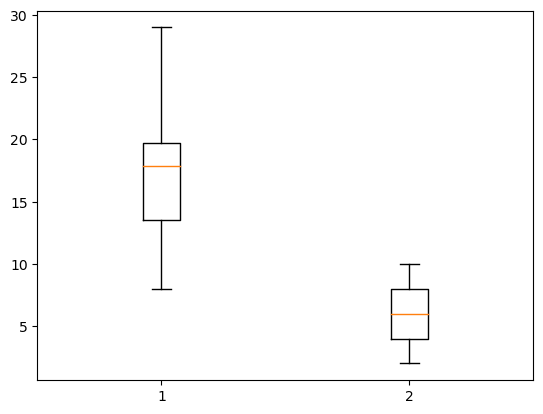

In [34]:
# Checking for outliers
plt.boxplot(dt)

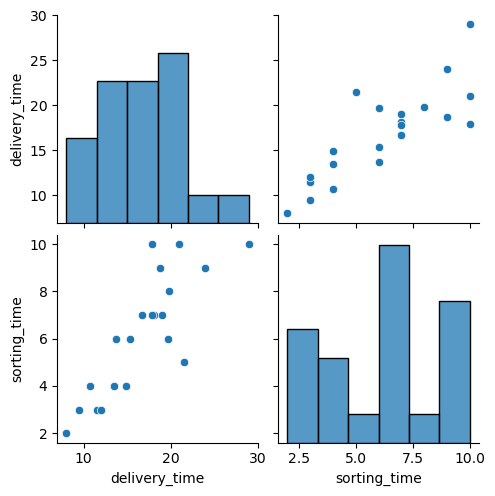

In [35]:
# Plotting a pair plot
sns.pairplot(dt)

In [36]:
# Checking the correlation
dt.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


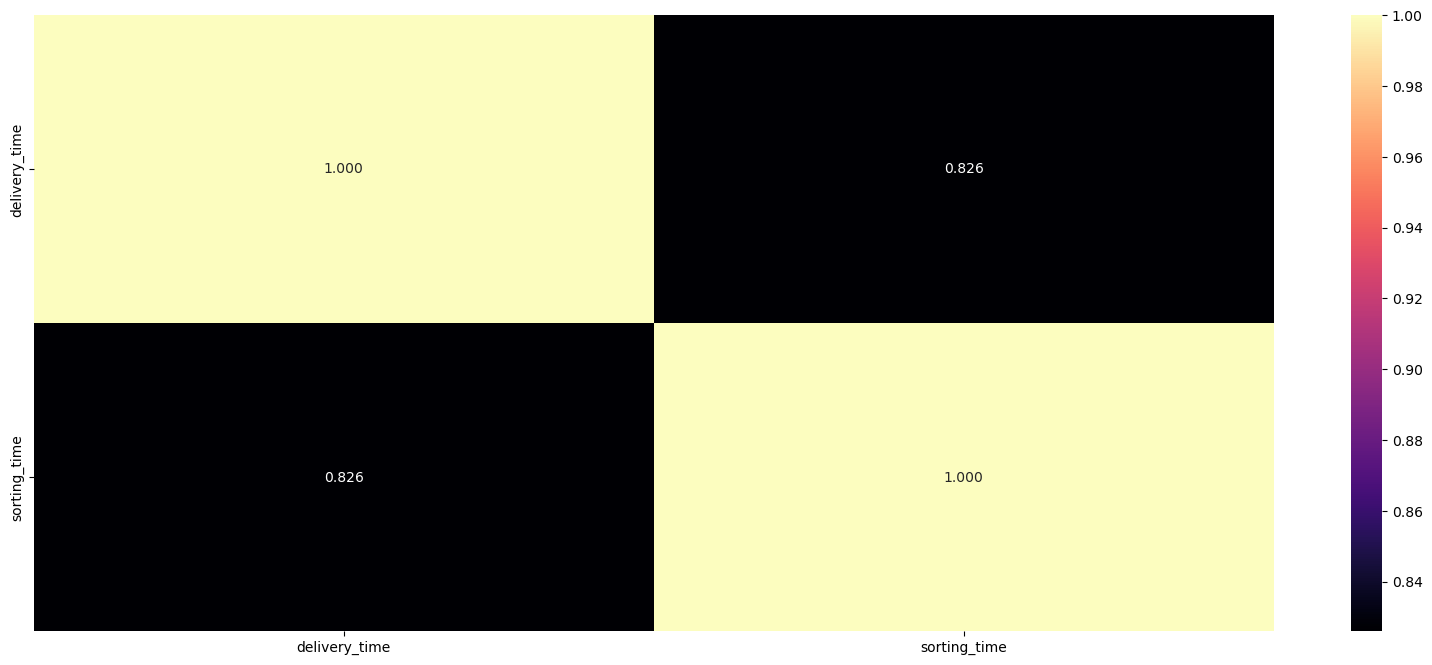

In [37]:
# Heatmap for correlaltion
plt.figure(figsize = (20, 8));
sns.heatmap(dt.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15896\251663663.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['delivery_time'])


<Axes: xlabel='delivery_time', ylabel='Density'>

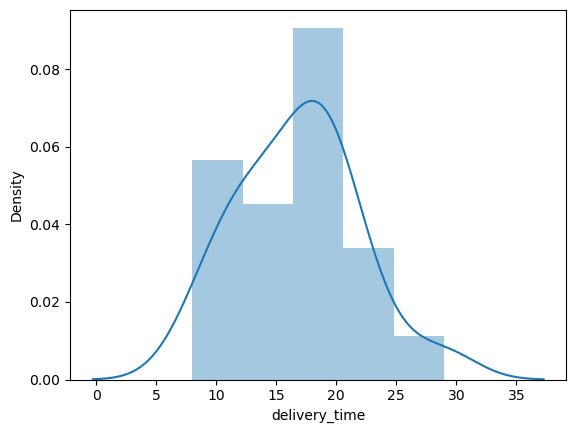

In [38]:
sns.distplot(dt['delivery_time'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15896\3046735856.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['sorting_time'])


<Axes: xlabel='sorting_time', ylabel='Density'>

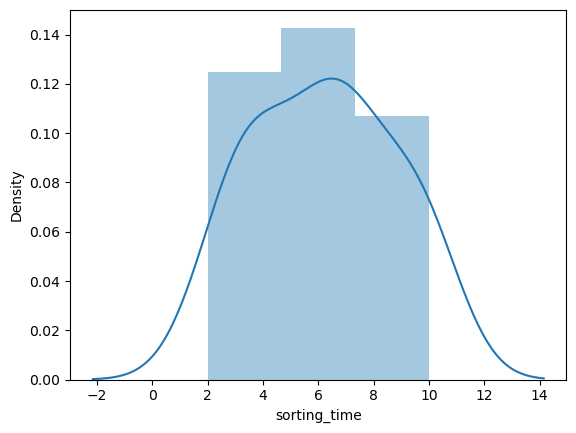

In [39]:
sns.distplot(dt['sorting_time'])

## Model Creation

In [40]:
model=smf.ols("delivery_time~sorting_time",data = dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        11:50:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model1=smf.ols("delivery_time~np.log(sorting_time)", data = dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        11:51:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model2=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 18 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           11:51:48   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model3=smf.ols("np.log(delivery_time)~np.square(sorting_time)",data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.621
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                     31.18
Date:                   Mon, 18 Dec 2023   Prob (F-statistic):           2.20e-05
Time:                           11:52:02   Log-Likelihood:                 4.9564
No. Observations:                     21   AIC:                            -5.913
Df Residuals:                         19   BIC:                            -3.824
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4290      0.076     32.014      0.000       2.270       2.588
np.square(sorting_time)     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model4=smf.ols("np.square(delivery_time)~np.square(sorting_time)",data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(delivery_time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Mon, 18 Dec 2023   Prob (F-statistic):           4.99e-05
Time:                              11:58:33   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(sorting_time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model5=smf.ols("np.square(np.log(delivery_time))~np.square(np.log(sorting_time))",data=dt).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     np.square(np.log(delivery_time))   R-squared:                       0.728
Model:                                          OLS   Adj. R-squared:                  0.714
Method:                               Least Squares   F-statistic:                     50.94
Date:                              Mon, 18 Dec 2023   Prob (F-statistic):           8.74e-07
Time:                                      11:58:34   Log-Likelihood:                -27.099
No. Observations:                                21   AIC:                             58.20
Df Residuals:                                    19   BIC:                             60.29
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.6788      0.481      9.725      0.000       3.672       5.686
np.square(np.log(sorting_time))     0.9752      0.137      7.137      0.000       0.689       1.261
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.450
Skew:                           0.642   Prob(JB):                        0.484
Kurtosis:                       3.105   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Our model2 is performing well with
print("R_squared = ", model2.rsquared)

R_squared =  0.77216134926874


# Q2 ANS

## Importing Libraries

In [2]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# Problem Statement
2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Importing Dataset

In [47]:
# import dataset
sal=pd.read_csv('Salary_Data.csv')

## PERFORMING EDA AND DATA VISUALIZATION

In [48]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [50]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
sal.shape

(30, 2)

In [62]:
# Checking the null
sal.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [64]:
# Checking the duplicates
sal[sal.duplicated('YearsExperience')]

,YearsExperience,Salary
8,3.2,64445.0
12,4.0,56957.0


In [67]:
# Remove the duplicates
sal_clean=sal.drop_duplicates()
sal.duplicated().sum()

0

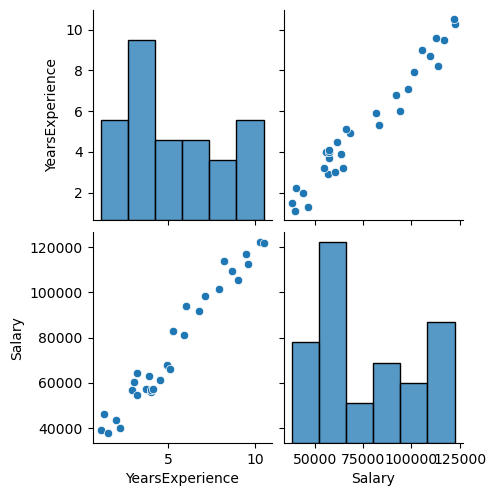

In [83]:
# Creating a pair plot
sns.pairplot(sal_clean)

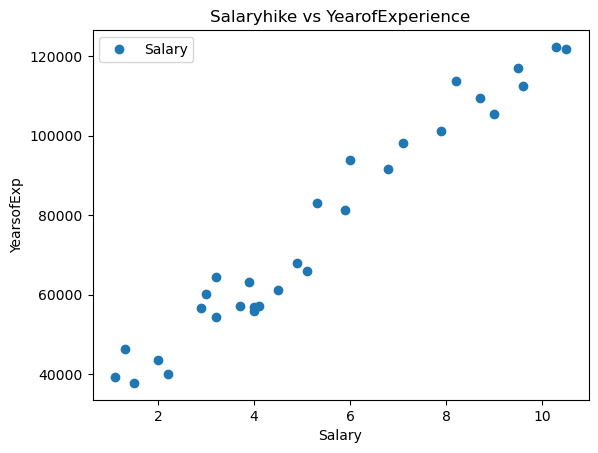

In [68]:
sal.plot(x='YearsExperience', y='Salary', style='o') 
plt.title('Salaryhike vs YearofExperience')  
plt.xlabel('Salary') 
plt.ylabel('YearsofExp')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1a211d22260>,
 'caps': [<matplotlib.lines.Line2D at 0x1a211d227a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a211d21fc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a211d22ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a211d22f80>],
 'means': []}

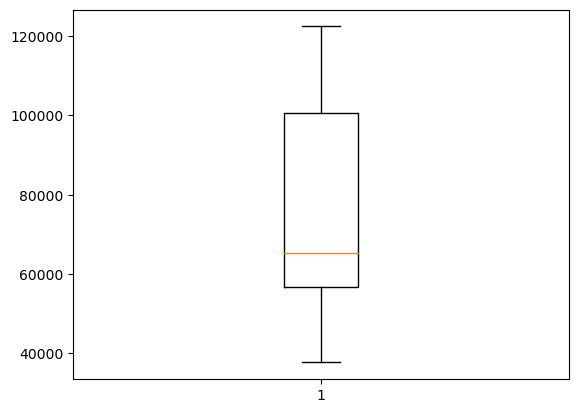

In [76]:
# Checking for outliers
plt.boxplot(sal_clean.Salary)

In [77]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(sal['Salary'], sal['YearsExperience'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


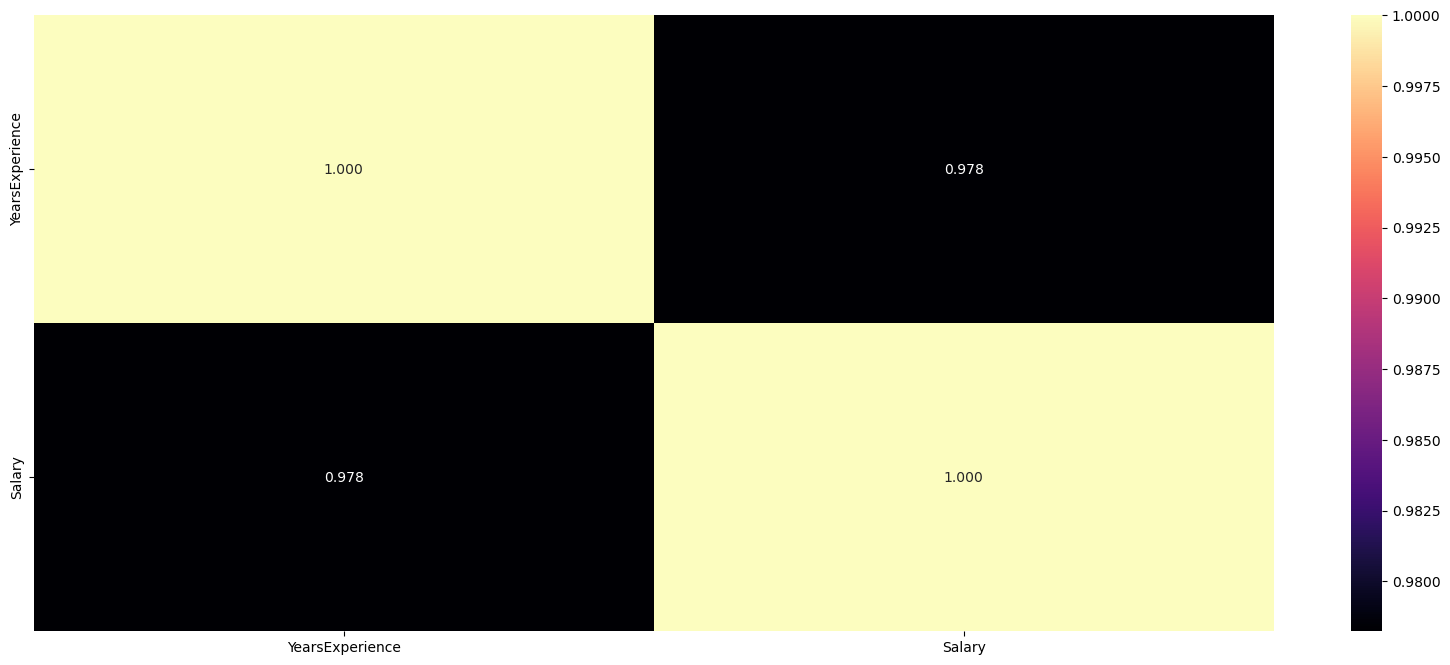

In [78]:
# Heatmap for correlaltion
plt.figure(figsize = (20, 8));
sns.heatmap(sal.corr(),cmap='magma', annot=True, fmt='.3f')
plt.show()

In [79]:
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(sal['Salary'], sal['YearsExperience'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.957


C:\Users\HP\AppData\Local\Temp\ipykernel_15896\3980090803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['Salary'])


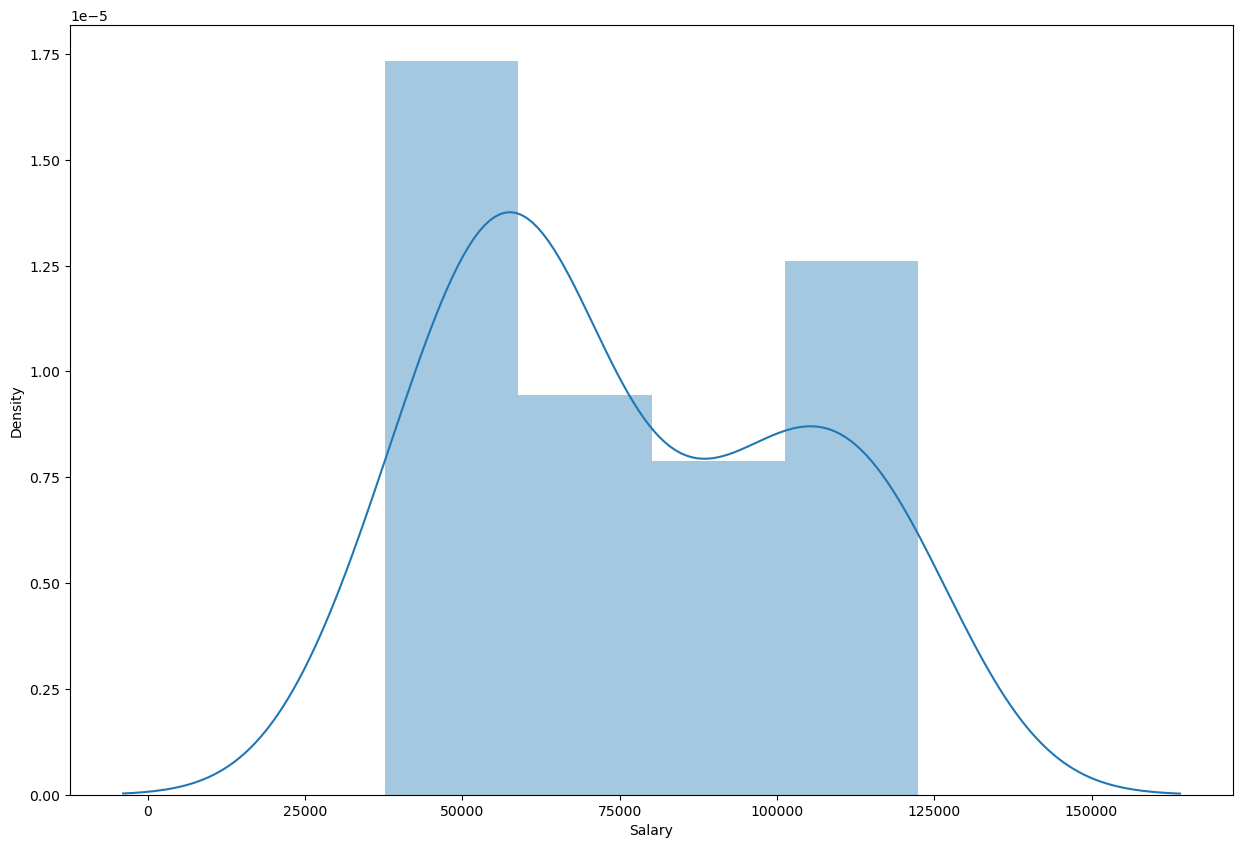

In [80]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(sal['Salary'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15896\368104561.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['YearsExperience'])


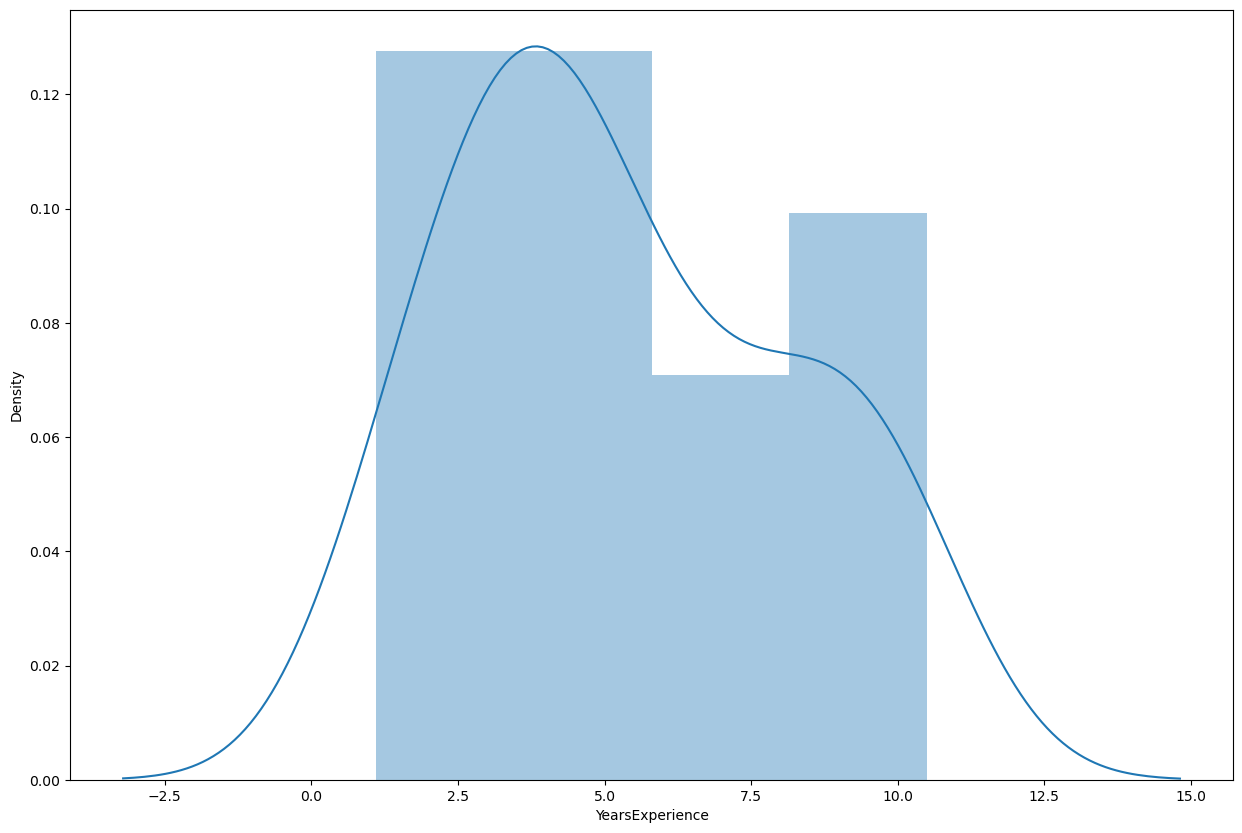

In [81]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(sal['YearsExperience'])
plt.show()

## Model Creation

In [85]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience", data= sal_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        12:14:38   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
model1=smf.ols("Salary~np.log(YearsExperience)", data= sal_clean).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        12:15:08   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model2=smf.ols("Salary~np.square(YearsExperience)", data= sal_clean).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.52e-16
Time:                        12:15:34   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model3=smf.ols("Salary~np.sqrt(YearsExperience)", data= sal_clean).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           8.57e-18
Time:                        12:15:35   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model4=smf.ols("Salary~np.log(np.sqrt(YearsExperience))", data= sal_clean).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           3.25e-13
Time:                        12:15:36   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(np.sqrt(YearsExperience))  8.116e+04   6344.907     12.792      0.000    6.82e+04    9.42e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Prediction

In [92]:
# Prediction for Salary hike

# As our model is the best performimng model we are using to predict the Salary hike

newdata=pd.Series([6,12,10])
dt_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
dt_pred

,YearsExperience
0,6
1,12
2,10


In [93]:
model.predict(dt_pred)

0     82491.974127
1    139191.748056
2    120291.823413
dtype: float64